<a href="https://colab.research.google.com/github/23r91a7354-arch/data/blob/main/preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
#dataset sample
data = {'Age':[35,47,np.nan,200,70,37],
        'salary':[70000,62000,41000,60500,42000,42000],
        'city':['A','B','B','A','A','A']
        }
df=pd.DataFrame(data)
print("original data:")
print(df)



original data:
     Age  salary city
0   35.0   70000    A
1   47.0   62000    B
2    NaN   41000    B
3  200.0   60500    A
4   70.0   42000    A
5   37.0   42000    A


In [2]:
df['Age']=df['Age'].fillna(df['Age'].mean())
print("new data:")
print(df)

new data:
     Age  salary city
0   35.0   70000    A
1   47.0   62000    B
2   77.8   41000    B
3  200.0   60500    A
4   70.0   42000    A
5   37.0   42000    A


In [4]:
Q1=df['Age'].quantile(0.25)
Q2=df['Age'].quantile(0.75)
IQR=Q2-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q2+1.5*IQR
df=df[(df['Age']>=lower_limit)&(df['Age']<=upper_limit)]
print("/n after noise removal)")
print(df)

/n after noise removal)
    Age  salary city
0  35.0   70000    A
1  47.0   62000    B
2  77.8   41000    B
4  70.0   42000    A
5  37.0   42000    A


In [3]:
df=df.drop_duplicates()
print("/n after removing redundant(duplicate)records")
print(df)

/n after removing redundant(duplicate)records
     Age  salary city
0   35.0   70000    A
1   47.0   62000    B
2   77.8   41000    B
3  200.0   60500    A
4   70.0   42000    A
5   37.0   42000    A


Accuracy of Decision Tree: 0.3333333333333333


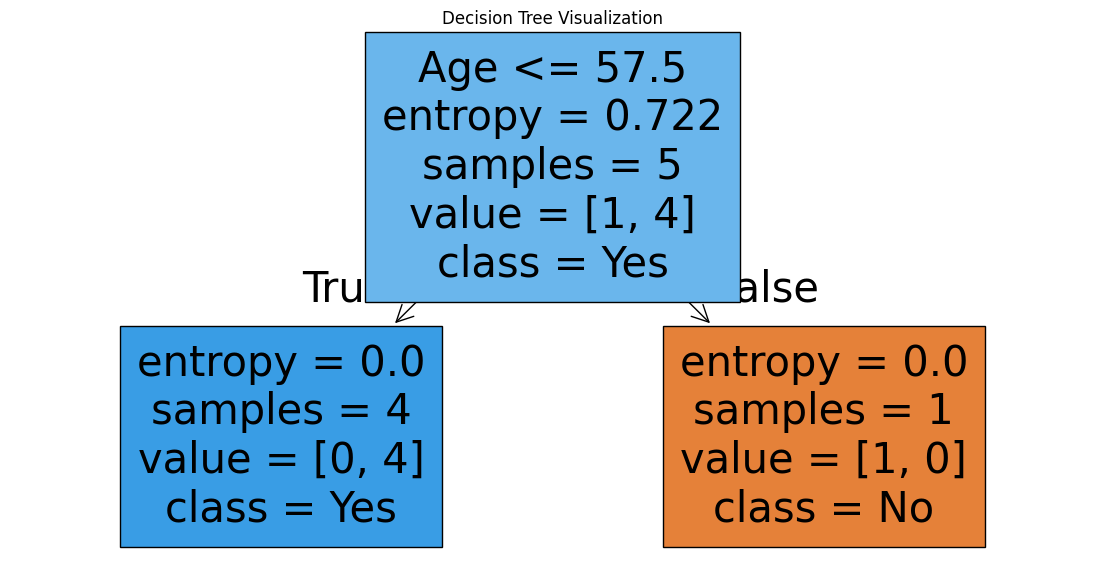

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Create dataset
data = {
    'Age': [22, 25, 47, 52, 46, 56, 55, 60],
    'Income': [25000, 30000, 50000, 60000, 45000, 65000, 70000, 80000],
    'Student': [1, 1, 0, 0, 0, 1, 0, 1],
    'Buys_Computer': [0, 0, 1, 1, 1, 1, 1, 0]
}

df = pd.DataFrame(data)

# Step 2: Split features and target
X = df.drop('Buys_Computer', axis=1)
y = df['Buys_Computer']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Step 4: Train Decision Tree model
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Decision Tree:", accuracy)

# Step 7: Plot the Decision Tree
plt.figure(figsize=(14, 7))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True
)
plt.title("Decision Tree Visualization")
plt.show()